In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statistics

In [2]:
def load_df(folder):
    #Load all parameter
    dfPsi = pd.read_csv('results//'+folder+'//psi.csv',header=None)
    dfPsi.columns = ['psi']

    dfTheta = pd.read_csv('results//'+folder+'//theta.csv',header=None)
    dfTheta.columns = ['theta']

    dfLambda = pd.read_csv('results//'+folder+'//lambda.csv',header=None)
    dfLambda.columns = ['lambda']

    dfPhi = pd.read_csv('results//'+folder+'//phi.csv',header=None)
    dfPhi.columns = ['phi']

    dfNum_h = pd.read_csv('results//'+folder+'//num_h.csv',header=None)
    dfNum_h.columns = ['num_h']

    #Load all data
    dfObj = pd.read_csv('results//'+folder+'//obj.csv',header=None)
    dfObj.columns = ['obj']

    dfNum_w = pd.read_csv('results//'+folder+'//num_wind.csv',header=None)
    dfNum_w.columns = ['num_wind']

    dfNum_s = pd.read_csv('results//'+folder+'//num_solar.csv',header=None)
    dfNum_s.columns = ['num_solar']

    dfNum_b = pd.read_csv('results//'+folder+'//num_bat.csv',header=None)
    dfNum_b.columns = ['num_bat']

    dfEod_SOC = pd.read_csv('results//'+folder+'//eod_SOC.csv',header=None)
    dfEod_SOC.columns = ['eod_SOC']

    dfEnergy_pruchased = pd.read_csv('results//'+folder+'//energy_p.csv',header=None)
    dfEnergy_pruchased.columns = ['energy_p']

    dfEnergy_sold = pd.read_csv('results//'+folder+'//energy_s.csv',header=None)
    dfEnergy_sold.columns = ['energy_s']

    dfEnergy_red = pd.read_csv('results//'+folder+'//energy_red.csv',header=None)
    dfEnergy_red.columns = ['energy_red']

    dfSoc = pd.read_csv('results//'+folder+'//soc.csv',header=None)
    dfSoc.columns = ['soc']

    #Parameter
    dfCombined = dfPsi
    dfCombined['theta'] = dfTheta['theta']
    dfCombined['lambda'] = dfLambda['lambda']
    dfCombined['phi'] = dfPhi['phi']
    dfCombined['num_h'] = dfNum_h['num_h']

    #Results daily level
    dfCombined['obj'] = dfObj['obj']
    dfCombined['num_wind'] = dfNum_w['num_wind']
    dfCombined['num_solar'] = dfNum_s['num_solar']
    dfCombined['num_bat'] = dfNum_b['num_bat']
    dfCombined['eod_SOC'] = dfEod_SOC['eod_SOC']

    dfCombined['energy_s'] = dfEnergy_sold['energy_s']

    #Results houirly level
    numberTests = len(dfPsi)
    dfCombined['energy_p'] = dfEnergy_pruchased['energy_p'].values.reshape(numberTests,24).tolist()
    dfCombined['energy_red'] = dfEnergy_red['energy_red'].values.reshape(numberTests,24).tolist()
    dfCombined['soc'] = dfSoc['soc'].values.reshape(numberTests,24).tolist()

    return dfCombined

# Number of Houses

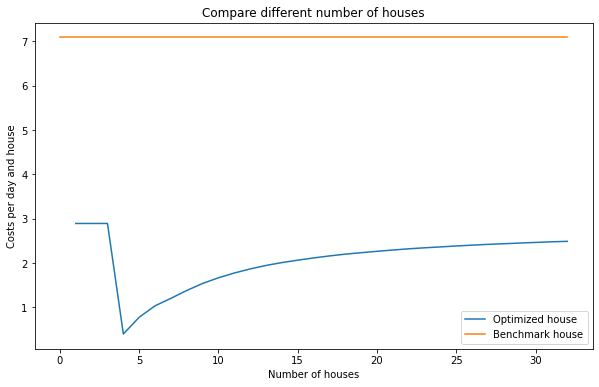

In [3]:
#Plot costs for different number of houses
dfCombined = load_df('house_estimation')

fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(x=dfCombined['num_h'],y=dfCombined['obj']/dfCombined['num_h'],label='Optimized house')
sns.lineplot(x=list(range(0,len(dfCombined)+1)),y=[7.09]*(len(dfCombined)+1),label='Benchmark house')

ax.set_title('Compare different number of houses')
ax.set_xlabel('Number of houses')
ax.set_ylabel('Costs per day and house')

plt.show()
fig.savefig("figures//num_houses_costs.png")

In [4]:
#Sum up kWh purchased on one day
dailyPurchase = []

for day in dfCombined['energy_p'].values:
    dailyPurchase.append(sum(day))

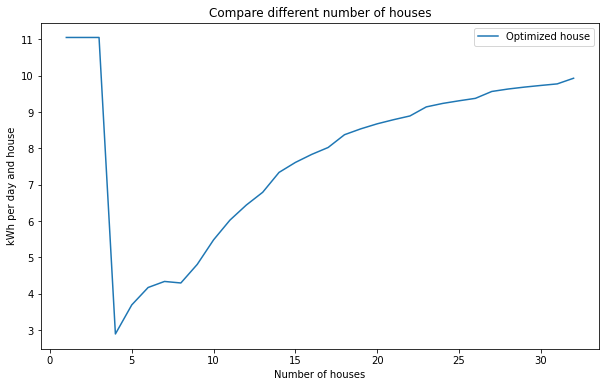

In [5]:
#Plot amount of kwh purchased
fig, ax = plt.subplots(figsize=(10,6))

sns.lineplot(x=dfCombined['num_h'],y=dailyPurchase/dfCombined['num_h'],label='Optimized house')

ax.set_title('Compare different number of houses')
ax.set_xlabel('Number of houses')
ax.set_ylabel('kWh per day and house')

plt.show()
fig.savefig("figures//num_houses_demand.png")

In [6]:
dailyPurchase/dfCombined['num_h']

0     11.052343
1     11.052343
2     11.052343
3      2.891754
4      3.692208
5      4.171301
6      4.337434
7      4.295273
8      4.806069
9      5.482703
10     6.025422
11     6.440224
12     6.791211
13     7.338608
14     7.613290
15     7.834832
16     8.024218
17     8.375976
18     8.538232
19     8.676064
20     8.789318
21     8.892276
22     9.141455
23     9.236885
24     9.309586
25     9.376694
26     9.565945
27     9.633548
28     9.686332
29     9.731934
30     9.774594
31     9.930200
Name: num_h, dtype: float64

# Psi

In [23]:
num_h = 7
dfCombined = load_df('psi_estimation')

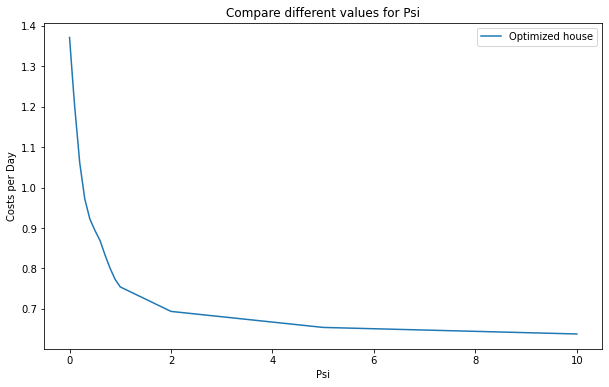

In [24]:
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.lineplot(x=dfCombined['psi'],y=dfCombined['obj']/dfCombined['num_h'],label='Optimized house')

ax.set_title('Compare different values for Psi')
ax.set_xlabel('Psi')
ax.set_ylabel('Costs per Day')

plt.show()
fig.savefig("figures//psi_costs.png")

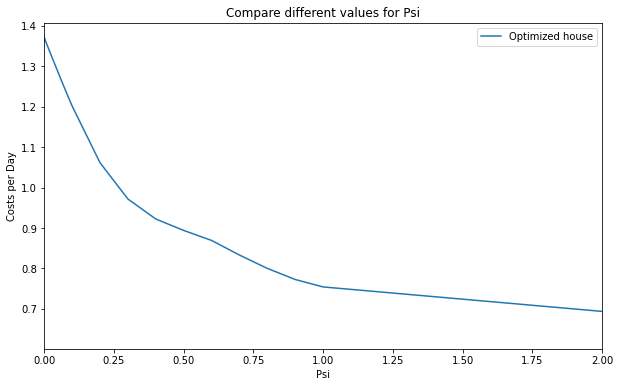

In [25]:
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.lineplot(x=dfCombined['psi'],y=dfCombined['obj']/dfCombined['num_h'],label='Optimized house')
ax.set_xlim(0,2)
ax.set_title('Compare different values for Psi')
ax.set_xlabel('Psi')
ax.set_ylabel('Costs per Day')

plt.show()
fig.savefig("figures//psi_costs_close.png")

In [27]:
#calculate deviation from mean 
devList = []
PAR = []

for i, values in enumerate(dfCombined['energy_p'].values):
    mean = statistics.mean(values)
    deviation = 0

    for val in values:
        deviation += abs(val-mean)/num_h

    PAR.append((max(values)/mean)/num_h)

    devList.append(deviation)

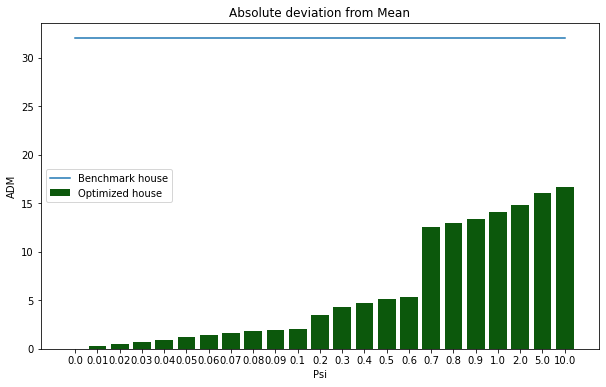

In [29]:
#Not used in report
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=dfCombined['psi'], y=devList, label='Optimized house', color='darkgreen')
ax.set(xlabel='Psi', ylabel='ADM')
ax.set_title('Absolute deviation from Mean')

ax = sns.lineplot(data=[32]*len(dfCombined['psi']),label='Benchmark house')

plt.show()

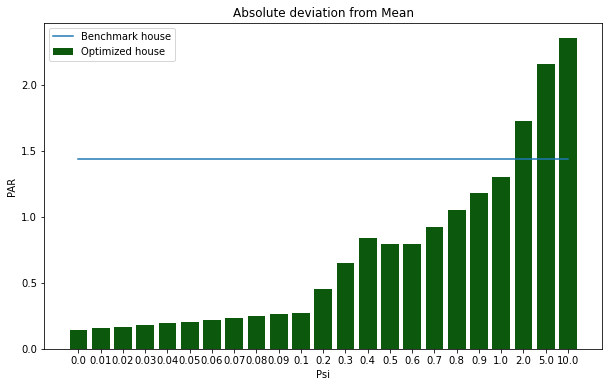

In [30]:
#Plot the PAR for different values of psi
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=dfCombined['psi'], y=PAR, label='Optimized house', color='darkgreen')
ax.set(xlabel='Psi', ylabel='PAR')
ax.set_title('Absolute deviation from Mean')

ax = sns.lineplot(data=[1.44]*len(dfCombined['psi']),label='Benchmark house')

plt.show()
fig.savefig("figures//psi_par.png")

In [31]:
PAR

[0.14285714285714285,
 0.1539432829310328,
 0.1658047691531709,
 0.17845342457185207,
 0.19189243191806366,
 0.20098838089153784,
 0.21500320336382558,
 0.22977634699396926,
 0.24527139117932775,
 0.2614433605598393,
 0.26825043054129155,
 0.4536973517998018,
 0.6487401644700256,
 0.8423634676926677,
 0.7909459071466813,
 0.7906039645446841,
 0.9260611158947087,
 1.0505970351547105,
 1.1771816467263674,
 1.3042202790525086,
 1.7261640281266897,
 2.156726134558352,
 2.3527838627757616]

# Theta

In [32]:
#Same as before for theta
dfCombined = load_df('theta_estimation')
dfCombined

,psi,theta,lambda,phi,num_h,obj,num_wind,num_solar,num_bat,eod_SOC,energy_s,energy_p,energy_red,soc
0,0.1,0.00,0.4,0.05,7,2.623063,1.0,60.0,42.0,1.565554,0.000000,"[2.1572353846648733, 2.076757460604046, 2.0178...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.565554152650514, 2.6774976832093387, 4.4418..."
1,0.1,0.01,0.4,0.05,7,3.356130,1.0,57.0,42.0,4.454854,0.000000,"[2.1925660290696785, 2.1081333137148435, 2.045...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.454854152650523, 5.602128327614166, 7.39789..."
2,0.1,0.02,0.4,0.05,7,4.076102,1.0,54.0,42.0,7.203154,0.000000,"[2.232051617844253, 2.14407960563238, 2.078428...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[7.203154152650533, 8.389913916388709, 10.2216..."
3,0.1,0.03,0.4,0.05,7,4.631523,1.0,52.0,42.0,9.880954,0.000000,"[2.234699085693551, 2.141999916443609, 2.07164...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.880954152650492, 11.070361384238, 12.899997..."
4,0.1,0.04,0.4,0.05,7,5.327489,1.0,49.0,42.0,12.370754,0.000000,"[2.2818020724793664, 2.186325346173519, 2.1136...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[12.37075415265053, 13.607264371023831, 15.481..."
5,0.1,0.05,0.4,0.05,7,5.863269,1.0,47.0,42.0,14.837054,0.000000,"[2.2906819568833305, 2.1911013151948757, 2.114...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[14.837054152650536, 16.082444255427802, 17.96..."
6,0.1,0.06,0.4,0.05,7,6.390319,1.0,45.0,42.0,17.209354,0.000000,"[2.302331804200453, 2.1989242434207386, 2.1185...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[17.209354152650533, 18.466394102744946, 20.35..."
7,0.1,0.07,0.4,0.05,7,6.908640,1.0,43.0,42.0,19.487654,0.783559,"[2.3167516144307787, 2.209794130851088, 2.1260...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[19.487654152650517, 20.75911391297528, 22.656..."
8,0.1,0.08,0.4,0.05,7,7.566792,1.0,40.0,42.0,21.483954,0.000000,"[2.378396906510812, 2.2701160964046307, 2.1856...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[21.483954152650465, 22.817059205055198, 24.77..."
9,0.1,0.09,0.4,0.05,7,8.068576,1.0,38.0,42.0,23.550754,0.000000,"[2.39904913329579, 2.28784164204511, 2.2006246...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[23.55075415265048, 24.90451143184022, 26.8799..."


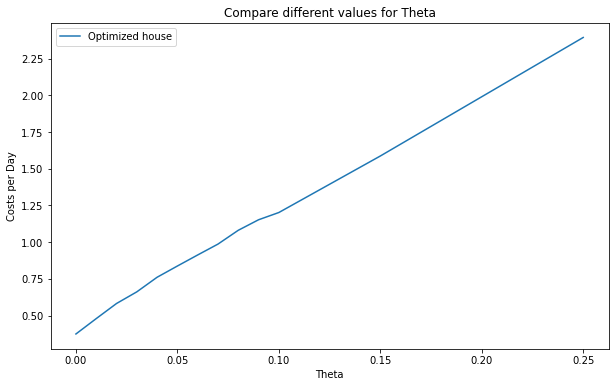

In [33]:
#Plot costs for different levels of theta
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.lineplot(x=dfCombined['theta'],y=dfCombined['obj']/dfCombined['num_h'],label='Optimized house')

ax.set_title('Compare different values for Theta')
ax.set_xlabel('Theta')
ax.set_ylabel('Costs per Day')

plt.show()
fig.savefig("figures//theta_costs.png")

--------

In [34]:
dfBenchmark = load_df('benchmark')
dfVis = dfCombined[dfCombined['theta'] == 0.1]

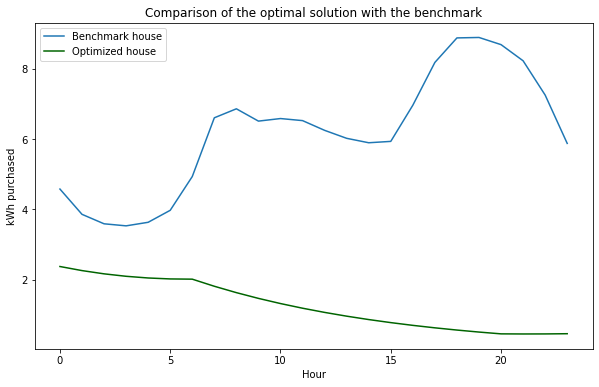

In [36]:
#Plot the endresult
fig, ax = plt.subplots(figsize=(10,6))

sns.lineplot(data=dfBenchmark['energy_p'].values[0], label='Benchmark house')
sns.lineplot(data=dfVis['energy_p'].values[0], label = 'Optimized house', color='darkgreen')

ax.set_title('Comparison of the optimal solution with the benchmark')
ax.set_xlabel('Hour')
ax.set_ylabel('kWh purchased')

plt.show()
fig.savefig("figures//end_result.png")

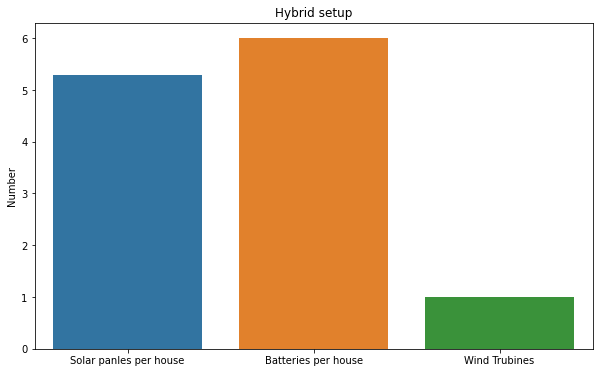

In [37]:
#Plot final setup
fig, ax = plt.subplots(figsize=(10,6))

n_s = dfVis['num_solar'].values[0]/num_h
n_b = dfVis['num_bat'].values[0]/num_h
n_w = dfVis['num_wind'].values[0]

sns.barplot(x=['Solar panles per house','Batteries per house','Wind Trubines'],y=[n_s,n_b,n_w])

ax.set_title('Hybrid setup')
ax.set_ylabel('Number')

plt.show()
fig.savefig("figures//end_result_setup.png")